In [1]:
import tensorflow
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
batch_size = 128
num_class = 10
epochs = 20

## 1. データを集める(load_mnistでダウンロード)

In [5]:
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#fashion_mnist = keras.datasets.fashion_mnist

In [6]:
len(x_train)

60000

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
keras.backend.image_data_format()

'channels_last'

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

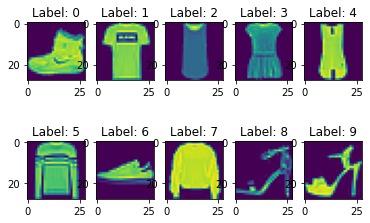

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [11]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

## 2. データを正規化

In [12]:
x_train, x_test = x_train/255.0, x_test/255.0

## 3.モデル（レイヤー構成）を定義
- Sequentialモデルを使用(3層のニューラルネットワーク)

In [17]:
model = keras.models.Sequential([
    #2次元の並び替え
    keras.layers.Conv2D(32, kernel_size=(3,3),
                       activation='relu',
                       input_shape=(28,28,1)),
    #二つ目のレイヤー
    keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    # 過学習の抑制
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    # 結合層:dense
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class,activation='softmax'),

])


## 4.最適化手法や損失関数などを定義(compile)

In [26]:
model.compile(optimizer='Nadam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## 5. トレーニングを実行(fitを実行)

In [25]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1450 - accuracy: 0.9451
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1369 - accuracy: 0.9491
Epoch 3/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1273 - accuracy: 0.9532
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1219 - accuracy: 0.9541
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1196 - accuracy: 0.9547
Epoch 6/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1139 - accuracy: 0.9564
Epoch 7/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1084 - accuracy: 0.9590
Epoch 8/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1066 - accuracy: 0.9601
Epoch 9/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1024 - accuracy: 0.9613
Epoch 10/10
1875/1875 [==============================] - 80s 43m

## 6. 制度を評価する（テストデータでevaluate）

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2662 - accuracy: 0.9301


[0.26616397500038147, 0.9301000237464905]

adam [0.23445187509059906, 0.9265000224113464]

In [21]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [22]:
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

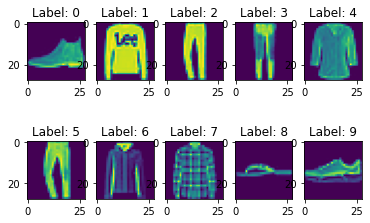

In [23]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(i))
    plt.imshow(x_test[i].reshape(28,28), cmap=None)

In [ ]:
model.predict(x_test)

In [ ]:
model.predict(x_test)[0]